# Binning

In [1]:
import pandas as pd
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32] 
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

bracket notatation

' [' signifies the value is included in the range

'(' signifies the value is NOT included in the range

In [2]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [3]:
marks = [65,75, 65, 80, 33, 90, 53]
grades = [0,60,70,80,100]
bins = pd.cut(marks, grades)

Binning: Assigning values to a particular range defined by upper and lower bounds of consecutive values. For here there are 4 bins
- bin 0 : 0  - 60      (values: 33 , 53)
- bin 1 : >60 - 70      (values: 65 , 65)
- bin 2 : >70- 80      (values: 75 , 80)
- bin 3 : >80- 100     (values: 90)

In [4]:
import numpy as np
lst = np.array(['F', 'C', 'B', 'A'])
bins.codes

array([1, 2, 1, 2, 0, 3, 0], dtype=int8)

In [5]:
lst[bins.codes]

array(['C', 'B', 'C', 'B', 'F', 'A', 'F'], dtype='<U1')

Bin the given list of blood pressures based on following:

data = [50, 120, 70, 80, 65, 75, 95, 99, 100]
- If BP is in between 0 -60 then :'LOW'

- If within range of 60 - 80 then 'NORMAL'

- If within range of 80 - 90 then : 'PRE-HYPERTENSION'

- If within range of 90 - 100 then : 'GRADE-1 HYPERTENSION'

- If within range 100 - 120 then: 'GRADE-2 HYPERTENSION'


In [6]:
data = [50, 120, 70, 80, 65, 75, 95, 99, 100, 102]

In [7]:
indexes = pd.cut(data, [0,60,80,90,100,120]).codes

In [8]:
np.array(['LOW', 'NORMAL', 
         'PRE-HYPERTENSION',
         'GRADE-1 HYPERTENION', 
         'GRADE-2 HYPERTENION'])[indexes]

array(['LOW', 'GRADE-2 HYPERTENION', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'GRADE-1 HYPERTENION', 'GRADE-1 HYPERTENION',
       'GRADE-1 HYPERTENION', 'GRADE-2 HYPERTENION'], dtype='<U19')

Homework: In Diabetes, Normal sugar level is in between 70 and 100. If less than 70 then sugar level is 'LOW'. A value between 100 & 125 indicaes 'PRE-DIABETES'. A value of above 125 indicates 'DIABETES'

Map the following data according to ranges explained above:

data = [59, 100, 75, 80, 96, 190, 250, 100, 125, 60, 50]

In [9]:
pd.cut(data, 
       [0,60,80,90,100,120],
       right = False,
       labels = ['LOW', 'NORMAL', 
         'PRE-HYPERTENSION',
         'GRADE-1 HYPERTENION', 
         'GRADE-2 HYPERTENION'])

[LOW, NaN, NORMAL, PRE-HYPERTENSION, NORMAL, NORMAL, GRADE-1 HYPERTENION, GRADE-1 HYPERTENION, GRADE-2 HYPERTENION, GRADE-2 HYPERTENION]
Categories (5, object): [LOW < NORMAL < PRE-HYPERTENSION < GRADE-1 HYPERTENION < GRADE-2 HYPERTENION]

In [10]:
pd.cut(data, [0,60,80,90,100,120], right = False).categories

IntervalIndex([[0, 60), [60, 80), [80, 90), [90, 100), [100, 120)],
              closed='left',
              dtype='interval[int64]')

In [11]:
pd.DataFrame(
    {'Student Names':['Hamza', 'Ali', 'Shahzad'],
     'Marks': [60,70, 80],
     'Grade' :[2.1, 3.5, 4.0]}).describe()

,Marks,Grade
count,3.0,3.000000
mean,70.0,3.200000
std,10.0,0.984886
min,60.0,2.100000
25%,65.0,2.800000
50%,70.0,3.500000
75%,75.0,3.750000
max,80.0,4.000000


In [123]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
display(df)
sampler = np.random.permutation(3) 
df.take(sampler)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


,0,1,2,3
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3


In [122]:
df.sample(3, replace = False)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
4,16,17,18,19


# Heirarchical Indexing

In [126]:
#
df = pd.Series(np.random.randn(9),
                  index = [['Karachi', 'Karachi',
                           'Karachi', 'Karachi',
                           'Lahore', 'Lahore',
                           'Lahore', 'Islamabad',
                           'Peshawar'],
                            ['Lalookhet',
                             'Nazimabad',
                             'Defence',
                             'Ayesha Manzil',
                             'Gulberg', 
                             'Anarkali',
                             'Johar', 'F-9',
                             'Qissa Khuwani']])
df

Karachi    Lalookhet        1.525170
           Nazimabad        0.680355
           Defence         -0.350698
           Ayesha Manzil   -0.689815
Lahore     Gulberg         -1.073992
           Anarkali         0.068895
           Johar            1.391941
Islamabad  F-9             -0.000861
Peshawar   Qissa Khuwani   -0.129102
dtype: float64

In [127]:
df['Karachi']['Defence': 'Ayesha Manzil']

Defence         -0.350698
Ayesha Manzil   -0.689815
dtype: float64

In [128]:
df['Karachi']['Defence']

-0.3506980137595663

In [130]:
a =df.unstack()

In [131]:
a.stack()

Islamabad  F-9             -0.000861
Karachi    Ayesha Manzil   -0.689815
           Defence         -0.350698
           Lalookhet        1.525170
           Nazimabad        0.680355
Lahore     Anarkali         0.068895
           Gulberg         -1.073992
           Johar            1.391941
Peshawar   Qissa Khuwani   -0.129102
dtype: float64

In [40]:
df.index.names = ['CITY' , 'REGION']
df

CITY       REGION       
Karachi    Lalookhet        0.174092
           Nazimabad       -0.209736
           Defence         -0.531756
           Ayesha Manzil    0.039120
Lahore     Gulberg          1.043625
           Anarkali         0.347401
           Johar            0.047426
Islamabad  F-9              1.196581
Peshawar   Qissa Khuwani    0.884904
dtype: float64

In [51]:
data = pd.Series(np.random.randn(6),
    index = [['Jan', 'Jan', 'Feb', 'Feb' , 'Feb', 'March']
                 , ["karachi" , 'Lahore' , 'karachi' , "Lahore", 'Isl', 'Peshware']])

In [52]:
data

Jan    karachi     0.844214
       Lahore      3.013341
Feb    karachi    -1.695488
       Lahore      1.145925
       Isl        -1.045154
March  Peshware   -0.352887
dtype: float64

In [53]:
data.index.names=['Months' , 'City']

In [54]:
data

Months  City    
Jan     karachi     0.844214
        Lahore      3.013341
Feb     karachi    -1.695488
        Lahore      1.145925
        Isl        -1.045154
March   Peshware   -0.352887
dtype: float64

In [58]:
data.swaplevel('City' , "Months" ).sort_index(level = 'City')

City      Months
Isl       Feb      -1.045154
Lahore    Feb       1.145925
          Jan       3.013341
Peshware  March    -0.352887
karachi   Feb      -1.695488
          Jan       0.844214
dtype: float64

In [60]:
data.sum(level = 'Months')

Months
Jan      3.857556
Feb     -1.594716
March   -0.352887
dtype: float64

In [132]:
data1 = pd.DataFrame(
    {'Names':['Hamza', 'Ali', 'Shahzad'],
     'Marks': [60,70, 80],
     'Grade' :[2.1, 3.5, 4.0]})

In [136]:
data2 = pd.DataFrame(
    {'Names':['Hamza', 'Ali', 'Shahzad'],
     'Courses':['Quantum', 'AI', '5G']})

In [139]:
pd.merge(data1,
         data2,
        left_on = 'Names',
         right_on = 'Courses',
         suffixes = ('Data1_','Data2_'))

,Names,Marks,Grade,Name,Courses


In [95]:
%matplotlib inline
import matplotlib.pyplot as plt

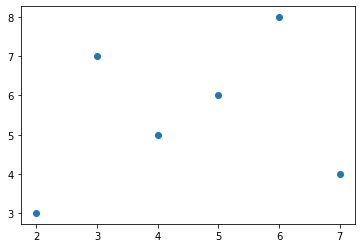

In [97]:
a = [2,3,4,5,6,7]
b = [3,7,5,6,8,4]
plt.scatter(a,b)

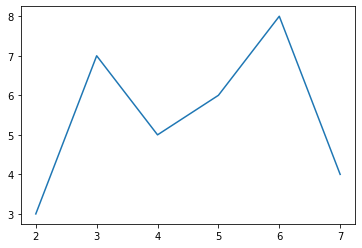

In [99]:
plt.plot(a,b)

In [100]:
!pip install seaborn

In [102]:
import seaborn as sb

In [103]:
df = sb.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Data Visualization (matplotlib, seaborn)

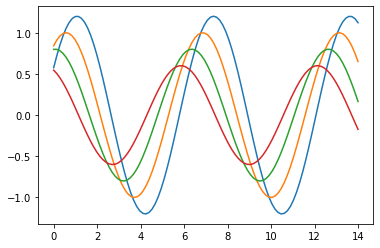

In [105]:
#line plot with matplotlib
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 14, 100)
for i in range(1, 5): 
    plt.plot(x, 
             np.sin(x + i * .5) * (7 - i) * 0.2)
plt.show()

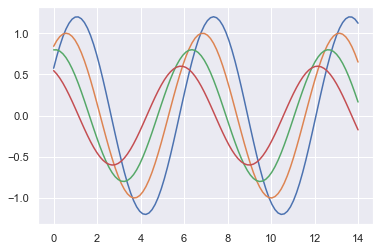

In [107]:
#line plot with seaborn
for i in range(1, 5): 
    plt.plot(x, 
             np.sin(x + i * .5) * (7 - i) * 0.2)
sb.set()
plt.show()

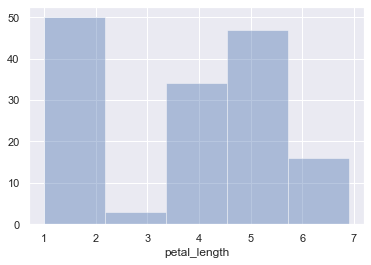

In [108]:
#Seaborn Histogram
df = sb.load_dataset('iris')
sb.distplot(df['petal_length'],kde = False)
plt.show()

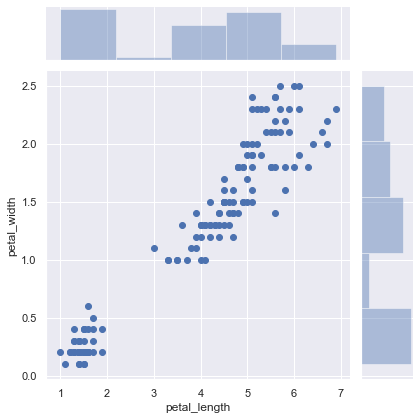

In [109]:
#Seaborn Scatter, Distribution
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df)
plt.show()

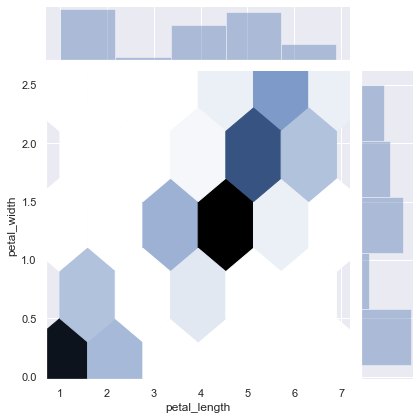

In [110]:
#
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df,kind = 'hex')
plt.show()

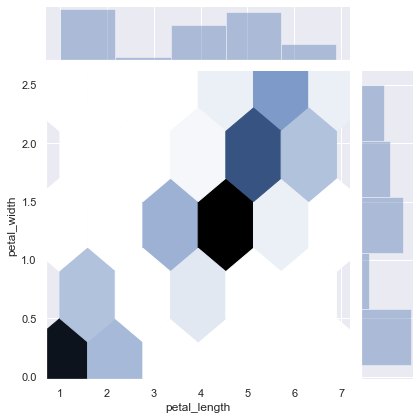

In [111]:
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df,kind = 'hex')
plt.show()

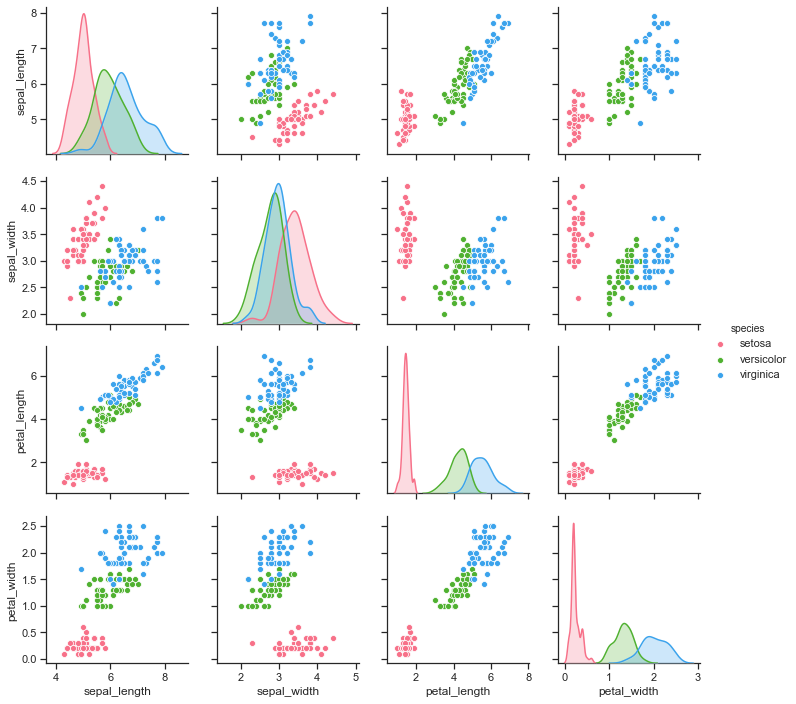

In [112]:
sb.set_style("ticks")
sb.pairplot(df,hue = 'species',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()


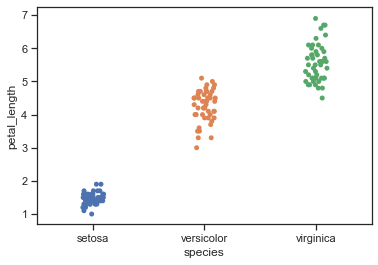

In [113]:
sb.stripplot(x = "species", y = "petal_length", data = df)
plt.show()

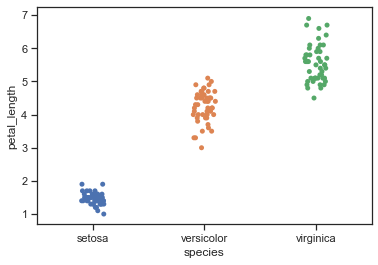

In [115]:
sb.stripplot(x = "species", y = "petal_length", data = df, jitter = True)
plt.show()

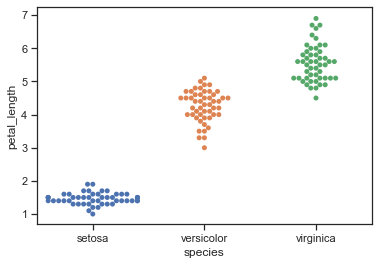

In [116]:
sb.swarmplot(x = "species", y = "petal_length", data = df)
plt.show()

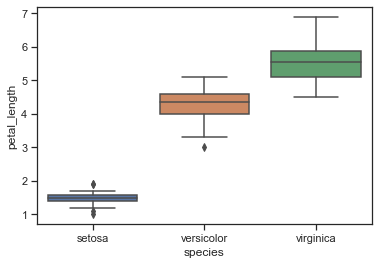

In [117]:
sb.boxplot(x = "species", y = "petal_length", data = df)
plt.show()